In [3]:
from datetime import datetime
from data_structure.nav_data_structure import RINEXNavigationData
from sat_pos_calc import SatellitePositionCalc

In [4]:
NAV_FILE = 'data/brdc2360.18n'
SP3_FILE = 'data/brdc2360.sp3'
POS_FILE = 'data/brdc2360.pos'

In [5]:
RINEX = RINEXNavigationData(NAV_FILE)

# Calculate position of satellite G01 in 2018-08-24 01:00:00

In [7]:
sat_pos_calc = SatellitePositionCalc()

prn = "G01"
nav_times = [
    datetime(2018, 8, 24, 0, 0, 0),
    datetime(2018, 8, 24, 1, 30, 0),
]
calc_times = [datetime(2018, 8, 24, 1, 0, 0)]
sat_pos_calc.calc_sat_pos_in_diff_time(prn, nav_times, calc_times)


Navigation  2018-08-24 00:00:00
Calculation 2018-08-24 01:00:00
Calculated Satellite Position [-13205383.694849968, 15498118.166812062, 16724633.352198847]
Error between .sp3 and calculated position 12.048038938256509
Delta between .sp3 and calculated position [9.775849968194962, 7.019187938421965, 0.5648011527955532]

Navigation  2018-08-24 01:30:00
Calculation 2018-08-24 01:00:00
Calculated Satellite Position [-13205378.92409278, 15498114.71283738, 16724627.009004006]
Error between .sp3 and calculated position 13.507719929033005
Delta between .sp3 and calculated position [5.005092781037092, 10.47316262125969, 6.90799599327147]



array([[12.04803894],
       [13.50771993]])

# Calculate position of satellite G01 - G32 from 00:00:00 to **23:59:30** in 2018-08-24 

# Read the calculated position data

In [8]:
CALC_POS_FILE = 'data/orbit.txt' 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Read and preview data

In [10]:
calc = pd.read_table(CALC_POS_FILE, sep=r'\s+', header=0)
calc.head()

,sod,prn,x,y,z
0,0.0,G01,-1.370432e+07,2.129326e+07,7317134.191
1,30.0,G01,-1.370105e+07,2.126350e+07,7408092.878
2,60.0,G01,-1.369771e+07,2.123342e+07,7498906.400
3,90.0,G01,-1.369429e+07,2.120300e+07,7589572.973
4,120.0,G01,-1.369081e+07,2.117225e+07,7680090.815


## Show information about the position data

In [11]:
calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91232 entries, 0 to 91231
Data columns (total 5 columns):
sod    91232 non-null float64
prn    91232 non-null object
x      91232 non-null float64
y      91232 non-null float64
z      91232 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


# Plot the satellite orbit 

## plot G01 and G02 Orbit

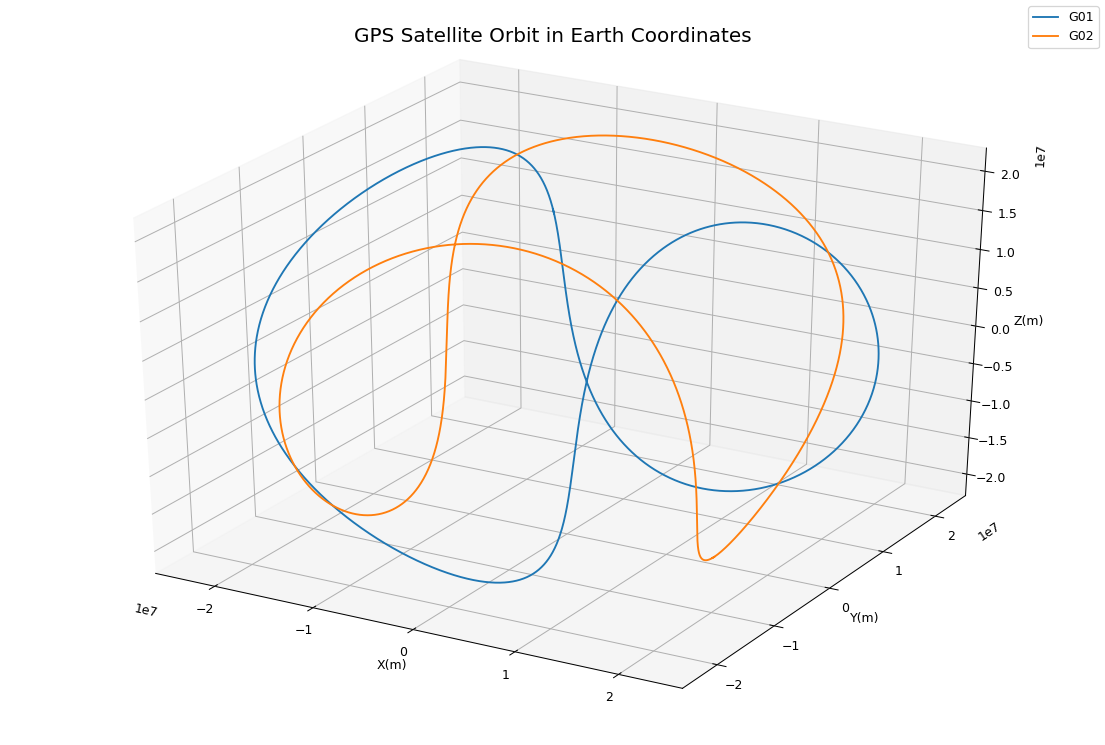

In [9]:
fig = plt.figure(figsize=(12, 8), dpi=90)
ax = Axes3D(fig)


def plot_orbit(sat):
    orbit_calc = calc[calc['prn'] == sat]
    ax.plot(xs=orbit_calc['x'], ys=orbit_calc['y'], zs=orbit_calc['z'], label=sat)

    
prns = [f'G{i:02n}' for i in range(1, 3)]

for i in prns:
    plot_orbit(i)
    
ax.set_xlabel("X(m)")
ax.set_ylabel("Y(m)")
ax.set_zlabel("Z(m)")

fig.suptitle("GPS Satellite Orbit in Earth Coordinates", fontsize=16)
fig.legend()

## Plot all the Satellites Orbit and save as jpg

See in directory `./orbit_fig`

In [15]:
sp3 = pd.read_table(SP3_FILE, sep=r'\s+', header=0)
pos = pd.read_table(POS_FILE, sep=r'\s+', header=0)

sp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91200 entries, 0 to 91199
Data columns (total 5 columns):
sod    91200 non-null float64
prn    91200 non-null object
x      91200 non-null float64
y      91200 non-null float64
z      91200 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [27]:
error = np.sqrt((sp3['x'] - pos['x'])**2 + (sp3['y'] - pos['y'])**2 + (sp3['z'] - pos['z'])**2)
error.describe()

count    91200.000000
mean         6.752295
std         26.558069
min          0.101297
25%          0.855353
50%          1.279188
75%          2.092610
max        173.553497
dtype: float64